In [9]:
pip install --upgrade google-cloud-aiplatform

Note: you may need to restart the kernel to use updated packages.


Executing extracted code...



# Data Quality Report for Dataset: `AI_Sample_data`

---

## Processing Table: `academy_data`

## 1. Completeness Check (Null Values)

Identifies rows with one or more null values.

### Violating Records:

Original_Row_Data_Str,Violation_Type,Violation_Reason,Recommendation,Column_Affected,Value_Causing_Violation
"{'MOVIE_NAME': 'The Incredibles', 'Feauture': None, 'Award_status': 'Nominated'}",Completeness,One or more columns (Feauture) have null values.,Investigate source system and consider imputing or removing nulls.,Feauture,NULL
"{'MOVIE_NAME': None, 'Feauture': 'Original Song', 'Award_status': 'Nominated'}",Completeness,One or more columns (MOVIE_NAME) have null values.,Investigate source system and consider imputing or removing nulls.,MOVIE_NAME,NULL
"{'MOVIE_NAME': None, 'Feauture': None, 'Award_status': None}",Completeness,"One or more columns (MOVIE_NAME, Feauture, Award_status) have null values.",Investigate source system and consider imputing or removing nulls.,"MOVIE_NAME, Feauture, Award_status",NULL
"{'MOVIE_NAME': 'Interstellar', 'Feauture': None, 'Award_status': None}",Completeness,"One or more columns (Feauture, Award_status) have null values.",Investigate source system and consider imputing or removing nulls.,"Feauture, Award_status",NULL


### Visualization: Null Value Counts


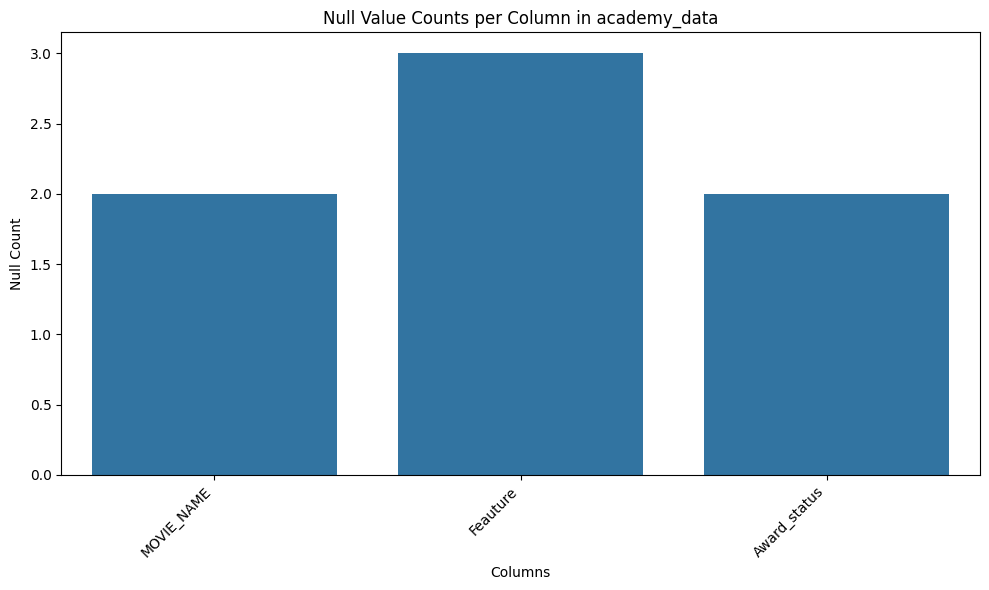

## 2. Uniqueness Check (Duplicate Rows)

Identifies rows that are exact duplicates.

### Violating Records:

Original_Row_Data_Str,Violation_Type,Violation_Reason,Recommendation,Column_Affected,Value_Causing_Violation
"{'MOVIE_NAME': 'Elemental', 'Feauture': 'Adapted Screenplay', 'Award_status': 'Ineligible'}",Uniqueness,Duplicate entries found violating primary key rules (or general uniqueness).,Ensure uniqueness constraints are applied during ingestion or identify root cause of duplication.,All Columns (Row Duplicate),Entire Row
"{'MOVIE_NAME': 'cars', 'Feauture': 'Original Song', 'Award_status': 'Nominated'}",Uniqueness,Duplicate entries found violating primary key rules (or general uniqueness).,Ensure uniqueness constraints are applied during ingestion or identify root cause of duplication.,All Columns (Row Duplicate),Entire Row
"{'MOVIE_NAME': 'Toy Story', 'Feauture': 'Animated Feature', 'Award_status': 'Award not yet introduced'}",Uniqueness,Duplicate entries found violating primary key rules (or general uniqueness).,Ensure uniqueness constraints are applied during ingestion or identify root cause of duplication.,All Columns (Row Duplicate),Entire Row
"{'MOVIE_NAME': 'Elemental', 'Feauture': 'Adapted Screenplay', 'Award_status': 'Ineligible'}",Uniqueness,Duplicate entries found violating primary key rules (or general uniqueness).,Ensure uniqueness constraints are applied during ingestion or identify root cause of duplication.,All Columns (Row Duplicate),Entire Row
"{'MOVIE_NAME': 'Toy Story 2', 'Feauture': 'Original Screenplay', 'Award_status': 'Ineligible'}",Uniqueness,Duplicate entries found violating primary key rules (or general uniqueness).,Ensure uniqueness constraints are applied during ingestion or identify root cause of duplication.,All Columns (Row Duplicate),Entire Row
"{'MOVIE_NAME': 'Toy Story 2', 'Feauture': 'Original Screenplay', 'Award_status': 'Ineligible'}",Uniqueness,Duplicate entries found violating primary key rules (or general uniqueness).,Ensure uniqueness constraints are applied during ingestion or identify root cause of duplication.,All Columns (Row Duplicate),Entire Row
"{'MOVIE_NAME': 'Toy Story', 'Feauture': 'Animated Feature', 'Award_status': 'Award not yet introduced'}",Uniqueness,Duplicate entries found violating primary key rules (or general uniqueness).,Ensure uniqueness constraints are applied during ingestion or identify root cause of duplication.,All Columns (Row Duplicate),Entire Row
"{'MOVIE_NAME': 'Toy Story', 'Feauture': 'Animated Feature', 'Award_status': 'Award not yet introduced'}",Uniqueness,Duplicate entries found violating primary key rules (or general uniqueness).,Ensure uniqueness constraints are applied during ingestion or identify root cause of duplication.,All Columns (Row Duplicate),Entire Row
"{'MOVIE_NAME': 'Elemental', 'Feauture': 'Adapted Screenplay', 'Award_status': 'Ineligible'}",Uniqueness,Duplicate entries found violating primary key rules (or general uniqueness).,Ensure uniqueness constraints are applied during ingestion or identify root cause of duplication.,All Columns (Row Duplicate),Entire Row
"{'MOVIE_NAME': 'cars', 'Feauture': 'Original Song', 'Award_status': 'Nominated'}",Uniqueness,Duplicate entries found violating primary key rules (or general uniqueness).,Ensure uniqueness constraints are applied during ingestion or identify root cause of duplication.,All Columns (Row Duplicate),Entire Row


### Visualization: Unique vs. Duplicate Rows


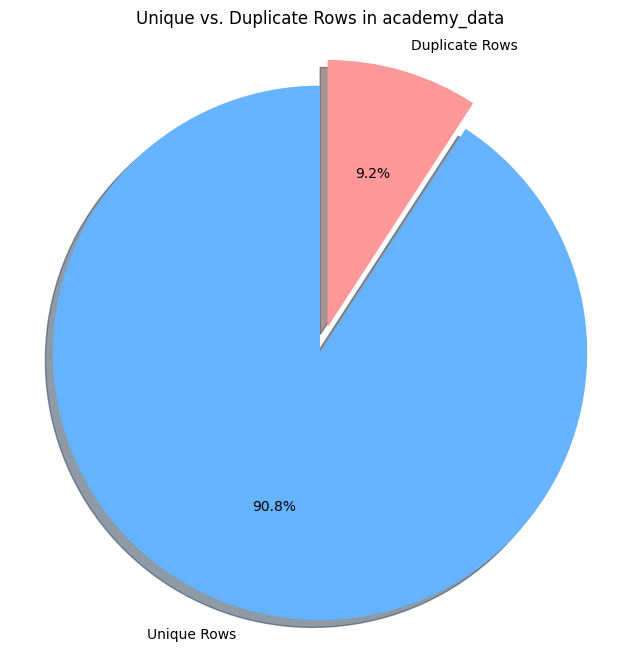

## 3. Data Type Consistency Check

Compares BigQuery schema types with Pandas inferred types.

No data type inconsistencies found between BigQuery schema and Pandas inferred types.

## 4. Categorical Columns: Suspicious Distributions

Flags categorical columns where a single value dominates more than 95% of entries.

No significantly skewed categorical columns found.

## 5. Pattern & Format Checks

Checks for special characters, inconsistent casing, and regex anomalies in string columns.

#### 5.1 Special Characters

### Violating Records:

Original_Row_Data_Str,Violation_Type,Violation_Reason,Recommendation,Column_Affected,Value_Causing_Violation
"{'MOVIE_NAME': 'Wall-E', 'Feauture': 'Original Script', 'Award_status': '✨Winner✨'}",Pattern & Format (Special Characters),Unexpected symbol detected in column 'Award_status'.,Use regex sanitation on ingestion or during data cleaning.,Award_status,✨Winner✨


### Visualization: Special Character Violations


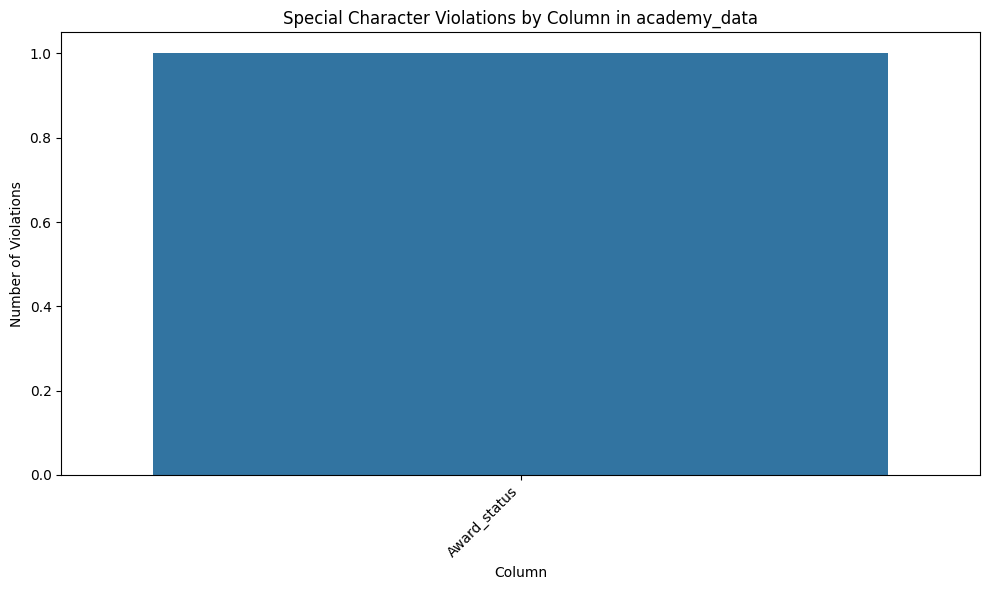

#### 5.2 Inconsistent Casing

### Violating Records:

Original_Row_Data_Str,Violation_Type,Violation_Reason,Recommendation,Column_Affected,Value_Causing_Violation
"{'MOVIE_NAME': ""A Bug's Life"", 'Feauture': 'Animated Feature', 'Award_status': 'Award not yet introduced'}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'MOVIE_NAME'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",MOVIE_NAME,A Bug's Life
"{'MOVIE_NAME': ""A Bug's Life"", 'Feauture': 'Adapted Screenplay', 'Award_status': 'Ineligible'}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'MOVIE_NAME'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",MOVIE_NAME,A Bug's Life
"{'MOVIE_NAME': ""A Bug's Life"", 'Feauture': 'Original Score', 'Award_status': 'Nominated'}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'MOVIE_NAME'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",MOVIE_NAME,A Bug's Life
"{'MOVIE_NAME': 'Parch@d', 'Feauture': 'Original Screenplay', 'Award_status': 'Nominated'}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'MOVIE_NAME'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",MOVIE_NAME,Parch@d
"{'MOVIE_NAME': '123', 'Feauture': 'Original Song', 'Award_status': 'Nominated'}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'MOVIE_NAME'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",MOVIE_NAME,123
"{'MOVIE_NAME': 'Toy Story', 'Feauture': 'Animated Feature', 'Award_status': 'Award not yet introduced'}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'Award_status'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",Award_status,Award not yet introduced
"{'MOVIE_NAME': ""A Bug's Life"", 'Feauture': 'Animated Feature', 'Award_status': 'Award not yet introduced'}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'Award_status'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",Award_status,Award not yet introduced
"{'MOVIE_NAME': 'Toy Story 2', 'Feauture': 'Animated Feature', 'Award_status': 'Award not yet introduced'}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'Award_status'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",Award_status,Award not yet introduced
"{'MOVIE_NAME': 'Toy Story', 'Feauture': 'Animated Feature', 'Award_status': 'Award not yet introduced'}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'Award_status'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",Award_status,Award not yet introduced
"{'MOVIE_NAME': 'Toy Story', 'Feauture': 'Animated Feature', 'Award_status': 'Award not yet introduced'}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'Award_status'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",Award_status,Award not yet introduced


### Visualization: Casing Formats Distribution


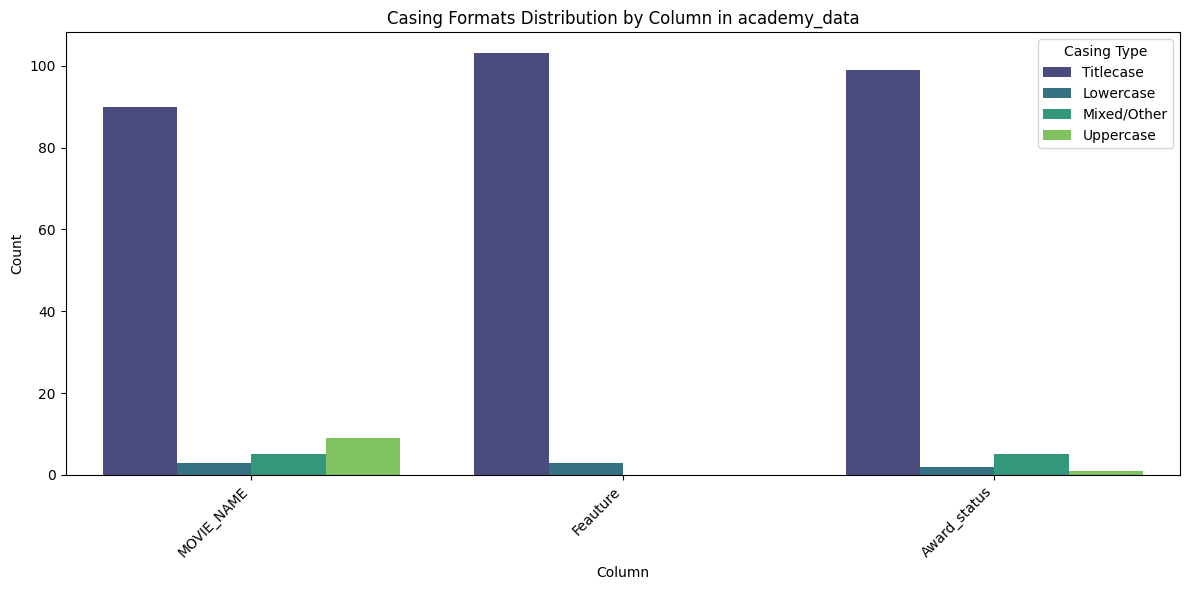

#### 5.3 Regex Anomalies

### Violating Records:

Original_Row_Data_Str,Violation_Type,Violation_Reason,Recommendation,Column_Affected,Value_Causing_Violation
"{'MOVIE_NAME': '123', 'Feauture': 'Original Song', 'Award_status': 'Nominated'}",Pattern & Format (Regex Anomaly - Numeric Only),Column 'MOVIE_NAME' contains numeric-only string where text is expected.,Update validation rules to reject suspicious values or convert to numeric type if appropriate.,MOVIE_NAME,123


### Visualization: Regex Anomaly Violations


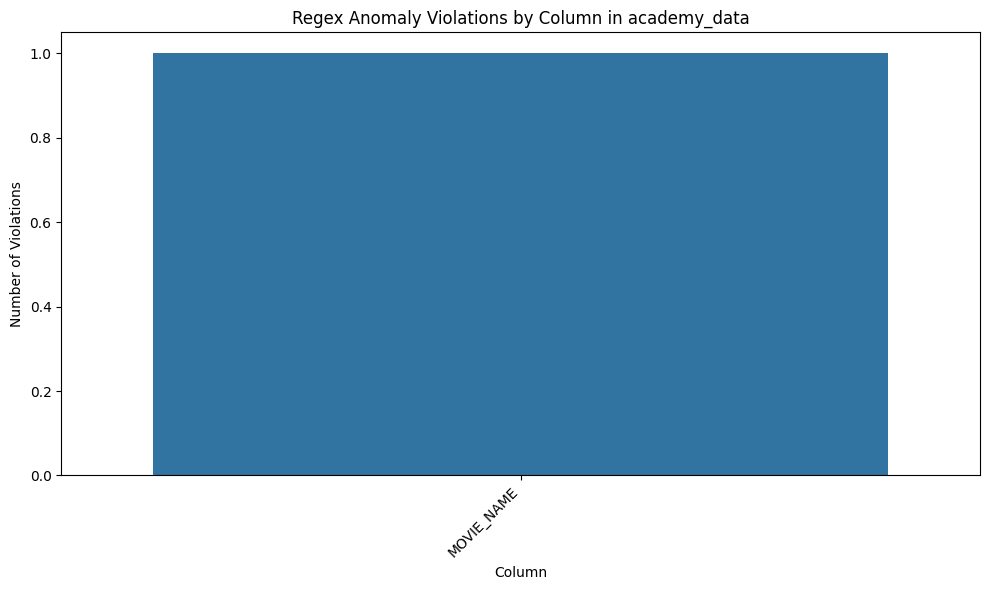

## Summary for Table: `academy_data`

Uploaded violations CSV to: `gs://data-violation-records/cloud_storage/academy_data/academy_data_violations.csv`

Uploaded summary CSV to: `gs://data-violation-records/cloud_storage/academy_data/academy_data_summary.csv`

Uploaded PDF report to: `gs://data-violation-records/cloud_storage/academy_data/academy_data_report.pdf`

Finished processing table `academy_data`.

Total violations found: 26

---

## Processing Table: `box_office`

## 1. Completeness Check (Null Values)

Identifies rows with one or more null values.

No null values found.

## 2. Uniqueness Check (Duplicate Rows)

Identifies rows that are exact duplicates.

No duplicate rows found.

## 3. Data Type Consistency Check

Compares BigQuery schema types with Pandas inferred types.

### Violating Records:

Original_Row_Data_Str,Violation_Type,Violation_Reason,Recommendation,Column_Affected,Value_Causing_Violation
{},Data Type Consistency,"Data types differ for column 'box_office_us_canada': BigQuery is 'int64', Pandas inferred 'Int64'.",Standardize type casting during ETL or adjust BigQuery schema.,box_office_us_canada,"BQ: int64, PD: Int64"
{},Data Type Consistency,"Data types differ for column 'box_office_other': BigQuery is 'int64', Pandas inferred 'Int64'.",Standardize type casting during ETL or adjust BigQuery schema.,box_office_other,"BQ: int64, PD: Int64"
{},Data Type Consistency,"Data types differ for column 'box_office_worldwide': BigQuery is 'int64', Pandas inferred 'Int64'.",Standardize type casting during ETL or adjust BigQuery schema.,box_office_worldwide,"BQ: int64, PD: Int64"


### Visualization: Data Type Consistency Heatmap


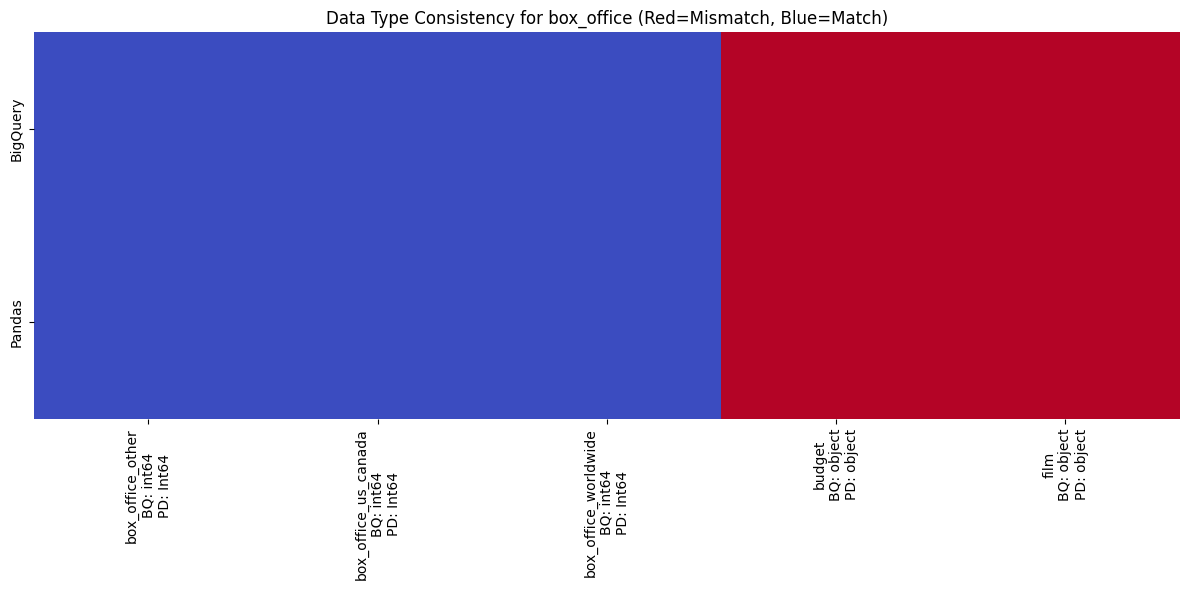

## 4. Categorical Columns: Suspicious Distributions

Flags categorical columns where a single value dominates more than 95% of entries.

No significantly skewed categorical columns found.

## 5. Pattern & Format Checks

Checks for special characters, inconsistent casing, and regex anomalies in string columns.

#### 5.1 Special Characters

No special character violations found.

#### 5.2 Inconsistent Casing

### Violating Records:

Original_Row_Data_Str,Violation_Type,Violation_Reason,Recommendation,Column_Affected,Value_Causing_Violation
"{'film': ""A Bug's Life"", 'budget': '120000000', 'box_office_us_canada': 162798565, 'box_office_other': 200460294, 'box_office_worldwide': 363258859}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'film'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",film,A Bug's Life
"{'film': 'Monsters, Inc.', 'budget': '115000000', 'box_office_us_canada': 255873250, 'box_office_other': 272900000, 'box_office_worldwide': 528773250}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'budget'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",budget,115000000
"{'film': ""A Bug's Life"", 'budget': '120000000', 'box_office_us_canada': 162798565, 'box_office_other': 200460294, 'box_office_worldwide': 363258859}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'budget'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",budget,120000000
"{'film': 'Cars', 'budget': '120000000', 'box_office_us_canada': 244082982, 'box_office_other': 217900167, 'box_office_worldwide': 461983149}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'budget'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",budget,120000000
"{'film': 'Ratatouille', 'budget': '150000000', 'box_office_us_canada': 206445654, 'box_office_other': 417280431, 'box_office_worldwide': 623726085}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'budget'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",budget,150000000
"{'film': 'Soul', 'budget': '150000000', 'box_office_us_canada': 946154, 'box_office_other': 120957731, 'box_office_worldwide': 121903885}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'budget'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",budget,150000000
"{'film': 'Up', 'budget': '175000000', 'box_office_us_canada': 293004164, 'box_office_other': 442094918, 'box_office_worldwide': 735099082}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'budget'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",budget,175000000
"{'film': 'Inside Out', 'budget': '175000000', 'box_office_us_canada': 356461711, 'box_office_other': 501149463, 'box_office_worldwide': 857611174}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'budget'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",budget,175000000
"{'film': 'The Good Dinosaur', 'budget': '175000000', 'box_office_us_canada': 123087120, 'box_office_other': 209120551, 'box_office_worldwide': 332207671}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'budget'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",budget,175000000
"{'film': 'Cars 3', 'budget': '175000000', 'box_office_us_canada': 152901115, 'box_office_other': 231029541, 'box_office_worldwide': 383930656}",Pattern & Format (Inconsistent Casing),Inconsistent casing detected in column 'budget'.,"Normalize casing using `.title()`, `.upper()`, or `.lower()` during ETL.",budget,175000000


### Visualization: Casing Formats Distribution


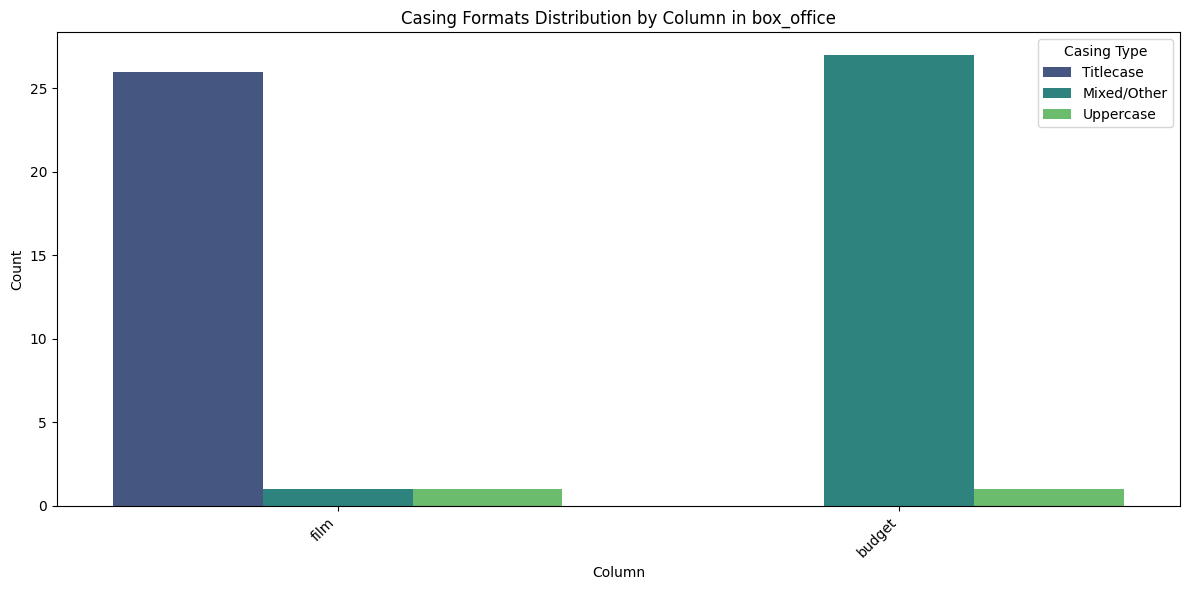

#### 5.3 Regex Anomalies

### Violating Records:

Original_Row_Data_Str,Violation_Type,Violation_Reason,Recommendation,Column_Affected,Value_Causing_Violation
"{'film': 'Monsters, Inc.', 'budget': '115000000', 'box_office_us_canada': 255873250, 'box_office_other': 272900000, 'box_office_worldwide': 528773250}",Pattern & Format (Regex Anomaly - Numeric Only),Column 'budget' contains numeric-only string where text is expected.,Update validation rules to reject suspicious values or convert to numeric type if appropriate.,budget,115000000
"{'film': ""A Bug's Life"", 'budget': '120000000', 'box_office_us_canada': 162798565, 'box_office_other': 200460294, 'box_office_worldwide': 363258859}",Pattern & Format (Regex Anomaly - Numeric Only),Column 'budget' contains numeric-only string where text is expected.,Update validation rules to reject suspicious values or convert to numeric type if appropriate.,budget,120000000
"{'film': 'Cars', 'budget': '120000000', 'box_office_us_canada': 244082982, 'box_office_other': 217900167, 'box_office_worldwide': 461983149}",Pattern & Format (Regex Anomaly - Numeric Only),Column 'budget' contains numeric-only string where text is expected.,Update validation rules to reject suspicious values or convert to numeric type if appropriate.,budget,120000000
"{'film': 'Ratatouille', 'budget': '150000000', 'box_office_us_canada': 206445654, 'box_office_other': 417280431, 'box_office_worldwide': 623726085}",Pattern & Format (Regex Anomaly - Numeric Only),Column 'budget' contains numeric-only string where text is expected.,Update validation rules to reject suspicious values or convert to numeric type if appropriate.,budget,150000000
"{'film': 'Soul', 'budget': '150000000', 'box_office_us_canada': 946154, 'box_office_other': 120957731, 'box_office_worldwide': 121903885}",Pattern & Format (Regex Anomaly - Numeric Only),Column 'budget' contains numeric-only string where text is expected.,Update validation rules to reject suspicious values or convert to numeric type if appropriate.,budget,150000000
"{'film': 'Up', 'budget': '175000000', 'box_office_us_canada': 293004164, 'box_office_other': 442094918, 'box_office_worldwide': 735099082}",Pattern & Format (Regex Anomaly - Numeric Only),Column 'budget' contains numeric-only string where text is expected.,Update validation rules to reject suspicious values or convert to numeric type if appropriate.,budget,175000000
"{'film': 'Inside Out', 'budget': '175000000', 'box_office_us_canada': 356461711, 'box_office_other': 501149463, 'box_office_worldwide': 857611174}",Pattern & Format (Regex Anomaly - Numeric Only),Column 'budget' contains numeric-only string where text is expected.,Update validation rules to reject suspicious values or convert to numeric type if appropriate.,budget,175000000
"{'film': 'The Good Dinosaur', 'budget': '175000000', 'box_office_us_canada': 123087120, 'box_office_other': 209120551, 'box_office_worldwide': 332207671}",Pattern & Format (Regex Anomaly - Numeric Only),Column 'budget' contains numeric-only string where text is expected.,Update validation rules to reject suspicious values or convert to numeric type if appropriate.,budget,175000000
"{'film': 'Cars 3', 'budget': '175000000', 'box_office_us_canada': 152901115, 'box_office_other': 231029541, 'box_office_worldwide': 383930656}",Pattern & Format (Regex Anomaly - Numeric Only),Column 'budget' contains numeric-only string where text is expected.,Update validation rules to reject suspicious values or convert to numeric type if appropriate.,budget,175000000
"{'film': 'Coco', 'budget': '175000000', 'box_office_us_canada': 210460015, 'box_office_other': 604181157, 'box_office_worldwide': 814641172}",Pattern & Format (Regex Anomaly - Numeric Only),Column 'budget' contains numeric-only string where text is expected.,Update validation rules to reject suspicious values or convert to numeric type if appropriate.,budget,175000000


### Visualization: Regex Anomaly Violations


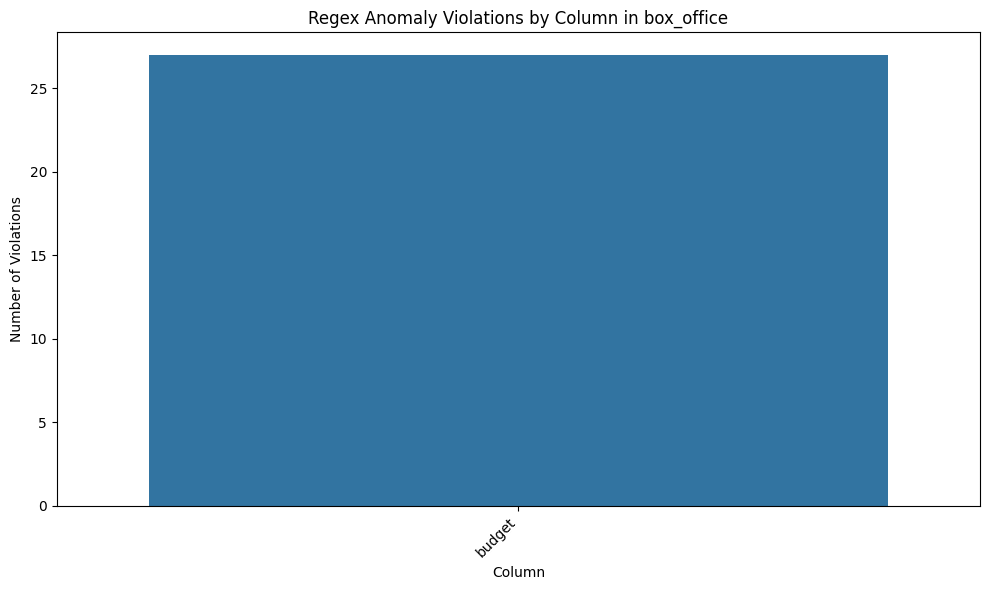

## Summary for Table: `box_office`

Uploaded violations CSV to: `gs://data-violation-records/cloud_storage/box_office/box_office_violations.csv`

Uploaded summary CSV to: `gs://data-violation-records/cloud_storage/box_office/box_office_summary.csv`

Uploaded PDF report to: `gs://data-violation-records/cloud_storage/box_office/box_office_report.pdf`

Finished processing table `box_office`.

Total violations found: 58

In [10]:
from vertexai.generative_models import GenerativeModel
import vertexai
import re

# Initialize Vertex AI
PROJECT_ID = "applied-abbey-464811-v0"
LOCATION = "us-central1"  # or "global" if supported
vertexai.init(project=PROJECT_ID, location=LOCATION)

# Load prompt
with open("new_prompt.txt", "r") as file:
    prompt = file.read()

# Create model instance
model = GenerativeModel("gemini-2.5-flash")  # or gemini-2.5-pro, etc.

# Generate content with tuning parameters
response = model.generate_content(
    prompt,
    generation_config={
        "temperature": 0.0,
        "top_p": 1.0,
        "top_k": 40,
        "candidate_count": 1
    }
)

# Extract and execute Python code from response
match = re.search(r"```(?:python)?(.*?)```", response.text, re.DOTALL)
if match:
    code_only = match.group(1).strip()
    print("Executing extracted code...\n")
    exec(code_only)
else:
    print("No valid code block found.")
    print(response.text)
